In [1]:
from datetime import timedelta
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import requests
import seaborn as sns
import glob
import json
import os

bdat = pd.read_csv(r'C:\Users\ASUS\Data Preparation Course Project\new_bdat.csv')
bdat

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,...,trip_duration,temp,precip,windspeed,humidity,snowdepth,cloudcover,solarradiation,uvindex,conditions
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,42.012800,-87.665906,42.012560,-87.674367,...,2.950000,37.0,0.000,11.4,77.0,0.5,95.6,24.9,1,Overcast
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,42.012763,-87.665967,42.012560,-87.674367,...,4.350000,13.9,0.000,15.0,46.9,1.3,39.6,67.7,3,Partially cloudy
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,Greenview Ave & Fullerton Ave,41.925602,-87.653708,41.925330,-87.665800,...,4.350000,8.8,0.000,14.1,55.1,2.5,11.7,82.7,4,Clear
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,Paulina St & Montrose Ave,41.983593,-87.669154,41.961507,-87.671387,...,14.933333,29.8,0.000,19.4,65.3,2.3,68.3,45.0,2,Partially cloudy
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,State St & Randolph St,41.877850,-87.624080,41.884621,-87.627834,...,6.033333,13.7,0.000,15.0,51.9,0.1,25.7,84.1,5,Partially cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4227286,43ABEE85B6E15DCA,classic_bike,2022-12-05 06:51:04,2022-12-05 06:54:48,Sangamon St & Washington Blvd,Peoria St & Jackson Blvd,41.883165,-87.651100,41.877642,-87.649618,...,3.733333,36.5,0.000,10.6,63.7,0.0,83.6,28.6,2,Partially cloudy
4227287,F041C89A3D1F0270,electric_bike,2022-12-14 17:06:28,2022-12-14 17:19:27,Bernard St & Elston Ave,Seeley Ave & Roscoe St,41.949980,-87.714019,41.943403,-87.679618,...,12.983333,40.1,0.831,19.3,87.5,0.0,100.0,5.6,0,"Rain, Overcast"
4227288,A2BECB88430BE156,classic_bike,2022-12-08 16:27:47,2022-12-08 16:32:20,Wacker Dr & Washington St,Green St & Madison St,41.883143,-87.637242,41.881859,-87.649264,...,4.550000,37.5,0.000,13.5,70.9,0.0,84.2,26.1,1,Partially cloudy
4227289,37B392960E566F58,classic_bike,2022-12-28 09:37:38,2022-12-28 09:41:34,Sangamon St & Washington Blvd,Peoria St & Jackson Blvd,41.883165,-87.651100,41.877642,-87.649618,...,3.933333,36.6,0.000,22.3,67.0,0.6,78.9,44.0,2,Partially cloudy


In [2]:
bdat.describe()

,start_lat,start_lng,end_lat,end_lng,start_hour,start_day_num,day_of_year,start_month_num,Quarter,trip_duration,temp,precip,windspeed,humidity,snowdepth,cloudcover,solarradiation,uvindex
count,4.227291e+06,4.227291e+06,4.227291e+06,4.227291e+06,4.227291e+06,4.227291e+06,4.227291e+06,4.227291e+06,4.227291e+06,4.227291e+06,4.227291e+06,4.227291e+06,4.227291e+06,4.227291e+06,4.227291e+06,4.227291e+06,4.227291e+06,4.227291e+06
mean,4.190215e+01,-8.764492e+01,4.190241e+01,-8.764505e+01,1.421403e+01,3.043744e+00,2.000138e+02,7.089447e+00,2.688998e+00,1.489367e+01,6.463281e+01,6.705239e-02,1.537814e+01,5.958494e+01,4.968224e-02,5.966474e+01,9.565280e+01,5.074912e+00
std,4.238817e-02,2.564027e-02,6.868734e-02,1.155076e-01,4.976665e+00,1.977366e+00,7.652183e+01,2.518606e+00,8.733024e-01,1.338345e+01,1.611950e+01,1.943438e-01,4.336726e+00,1.087680e+01,3.191945e-01,2.517260e+01,5.136592e+01,2.496640e+00
min,4.164850e+01,-8.783332e+01,0.000000e+00,-8.783000e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-4.300000e+00,0.000000e+00,7.200000e+00,3.300000e+01,0.000000e+00,4.100000e+00,4.400000e+00,0.000000e+00
25%,4.188112e+01,-8.765833e+01,4.188132e+01,-8.765862e+01,1.100000e+01,1.000000e+00,1.490000e+02,5.000000e+00,2.000000e+00,6.200000e+00,5.550000e+01,0.000000e+00,1.190000e+01,5.220000e+01,0.000000e+00,4.000000e+01,5.680000e+01,3.000000e+00
50%,4.189720e+01,-8.764190e+01,4.189776e+01,-8.764288e+01,1.500000e+01,3.000000e+00,2.020000e+02,7.000000e+00,3.000000e+00,1.063333e+01,7.080000e+01,0.000000e+00,1.490000e+01,5.850000e+01,0.000000e+00,6.150000e+01,8.060000e+01,5.000000e+00
75%,4.192877e+01,-8.762872e+01,4.192889e+01,-8.762915e+01,1.800000e+01,5.000000e+00,2.580000e+02,9.000000e+00,3.000000e+00,1.865000e+01,7.610000e+01,1.300000e-02,1.800000e+01,6.750000e+01,0.000000e+00,8.120000e+01,1.433000e+02,7.000000e+00
max,4.563503e+01,-7.379648e+01,4.206485e+01,0.000000e+00,2.300000e+01,6.000000e+00,3.650000e+02,1.200000e+01,4.000000e+00,9.000000e+01,9.040000e+01,1.386000e+00,3.380000e+01,8.810000e+01,3.900000e+00,1.000000e+02,2.194000e+02,1.000000e+01


In [3]:
trip_per_day = bdat.groupby(bdat['Date'])['ride_id'].count()
trip_per_day

Date
2022-01-01    1725
2022-01-02    1400
2022-01-03    2271
2022-01-04    3282
2022-01-05    1945
              ... 
2022-12-27    1656
2022-12-28    3071
2022-12-29    4788
2022-12-30    4727
2022-12-31    3627
Name: ride_id, Length: 365, dtype: int64

In [4]:
d_weather = bdat.groupby([bdat['Date']])['temp', 'precip', 'windspeed', 'humidity', 'snowdepth', 
                                          'cloudcover', 'solarradiation', 'uvindex'].mean()
d_weather

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14584\3056892306.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  d_weather = bdat.groupby([bdat['Date']])['temp', 'precip', 'windspeed', 'humidity', 'snowdepth',


,temp,precip,windspeed,humidity,snowdepth,cloudcover,solarradiation,uvindex
Date,,,,,,,,
2022-01-01,34.8,0.090,22.7,81.7,0.2,100.0,5.0,0.0
2022-01-02,23.5,0.032,19.0,73.1,1.3,66.5,33.1,2.0
2022-01-03,17.2,0.000,12.9,61.3,2.2,11.3,58.3,3.0
2022-01-04,29.8,0.000,19.4,65.3,2.3,68.3,45.0,2.0
2022-01-05,19.7,0.000,26.2,66.4,2.2,93.0,40.1,2.0
...,...,...,...,...,...,...,...,...
2022-12-27,17.2,0.000,20.2,73.7,0.9,60.2,50.9,2.0
2022-12-28,36.6,0.000,22.3,67.0,0.6,78.9,44.0,2.0
2022-12-29,51.5,0.000,21.2,80.5,0.1,82.4,18.8,1.0


In [5]:
trip_weather = pd.merge(trip_per_day, d_weather, on="Date")
trip_weather.rename(columns={'ride_id': 'total rides'}, inplace=True)
trip_weather

,total rides,temp,precip,windspeed,humidity,snowdepth,cloudcover,solarradiation,uvindex
Date,,,,,,,,,
2022-01-01,1725,34.8,0.090,22.7,81.7,0.2,100.0,5.0,0.0
2022-01-02,1400,23.5,0.032,19.0,73.1,1.3,66.5,33.1,2.0
2022-01-03,2271,17.2,0.000,12.9,61.3,2.2,11.3,58.3,3.0
2022-01-04,3282,29.8,0.000,19.4,65.3,2.3,68.3,45.0,2.0
2022-01-05,1945,19.7,0.000,26.2,66.4,2.2,93.0,40.1,2.0
...,...,...,...,...,...,...,...,...,...
2022-12-27,1656,17.2,0.000,20.2,73.7,0.9,60.2,50.9,2.0
2022-12-28,3071,36.6,0.000,22.3,67.0,0.6,78.9,44.0,2.0
2022-12-29,4788,51.5,0.000,21.2,80.5,0.1,82.4,18.8,1.0


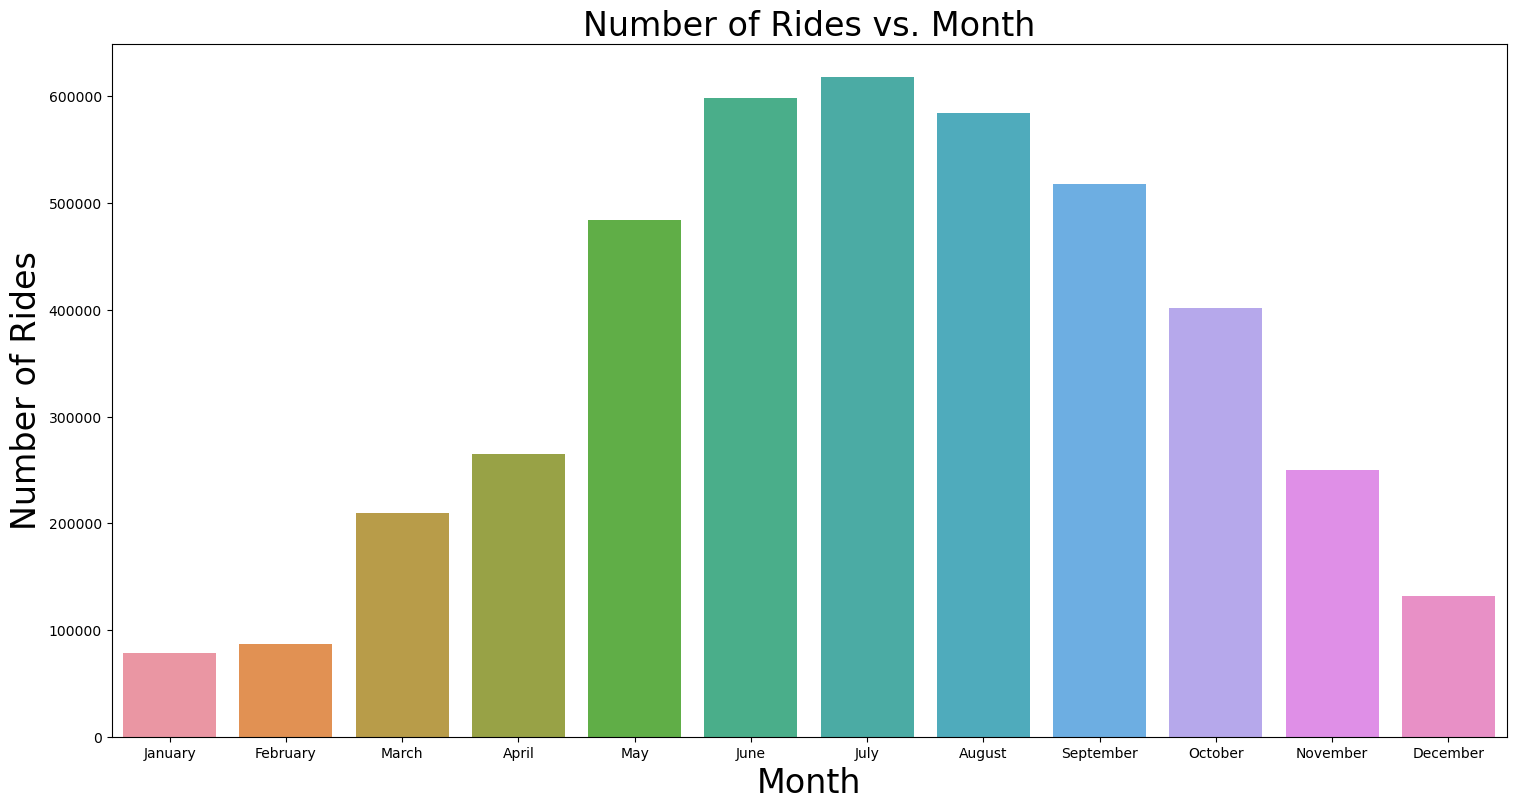

In [6]:
# Trip distribution
fig, ax = plt.subplots(figsize=(18, 9))
sns.countplot(x='start_month_name', data=bdat, ax=ax)
ax.set_title('Number of Rides vs. Month', fontsize=24)
ax.set_xlabel('Month', fontsize=24)
ax.set_ylabel('Number of Rides', fontsize=24)
plt.show()

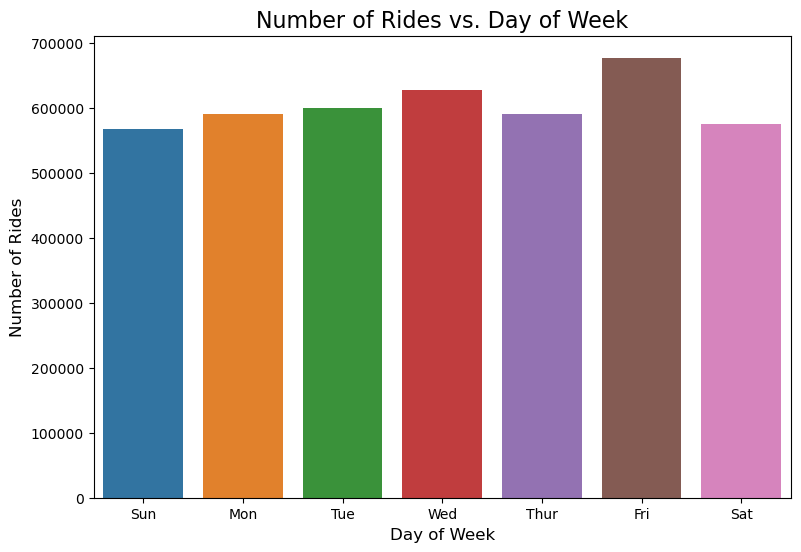

In [7]:
# Trip distribution
fig, ax = plt.subplots(figsize=(9, 6))
sns.countplot(x='start_day_num', data=bdat, ax=ax)
ax.set_xticklabels(('Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat'))
ax.set_title('Number of Rides vs. Day of Week', fontsize=16)
ax.set_xlabel('Day of Week', fontsize=12)
ax.set_ylabel('Number of Rides', fontsize=12)
plt.show()

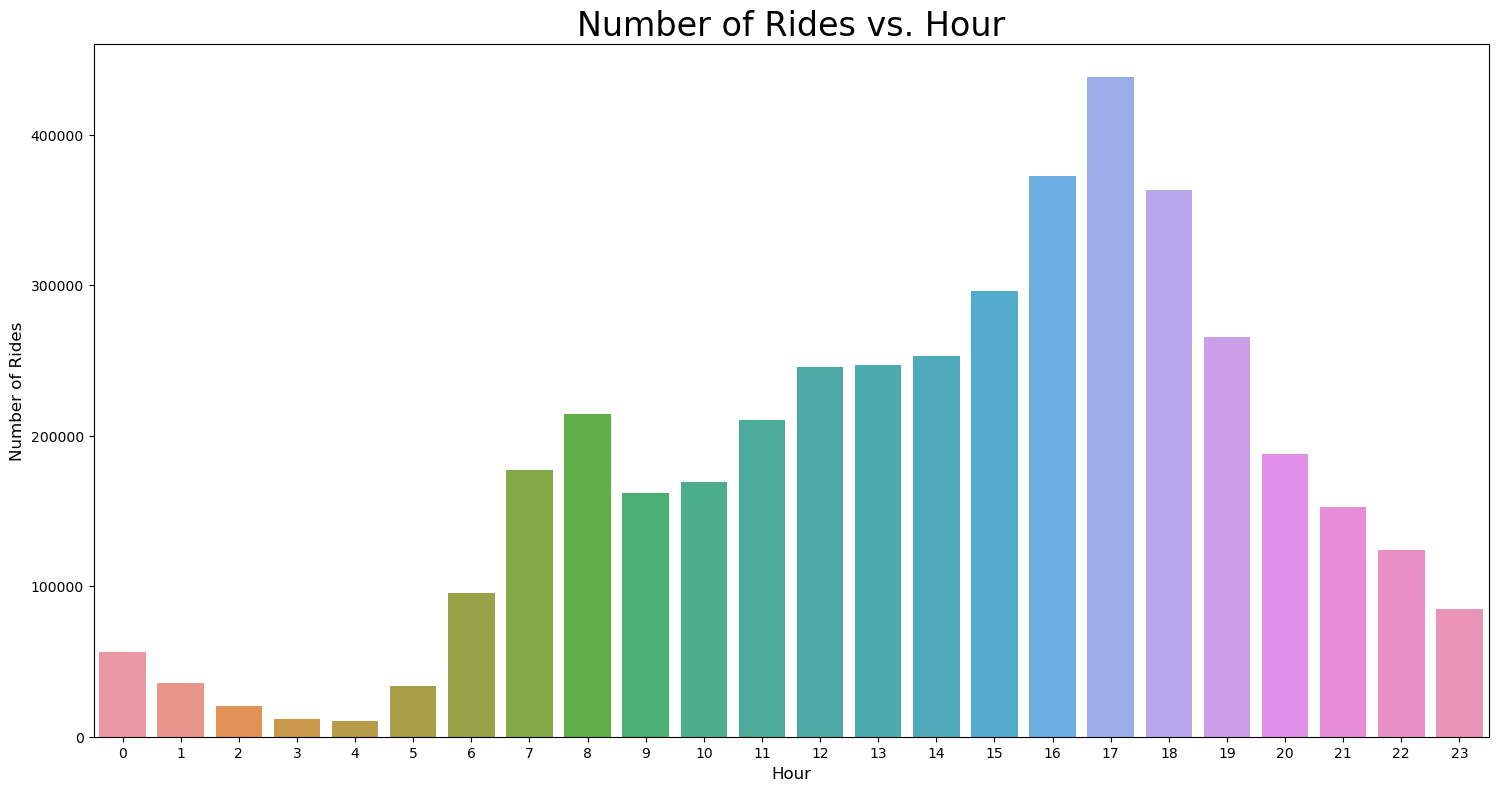

In [8]:
# Trip distribution
fig, ax = plt.subplots(figsize=(18, 9))
sns.countplot(x='start_hour', data=bdat, ax=ax)
ax.set_title('Number of Rides vs. Hour', fontsize=24)
ax.set_xlabel('Hour', fontsize=12)
ax.set_ylabel('Number of Rides', fontsize=12)
plt.show()

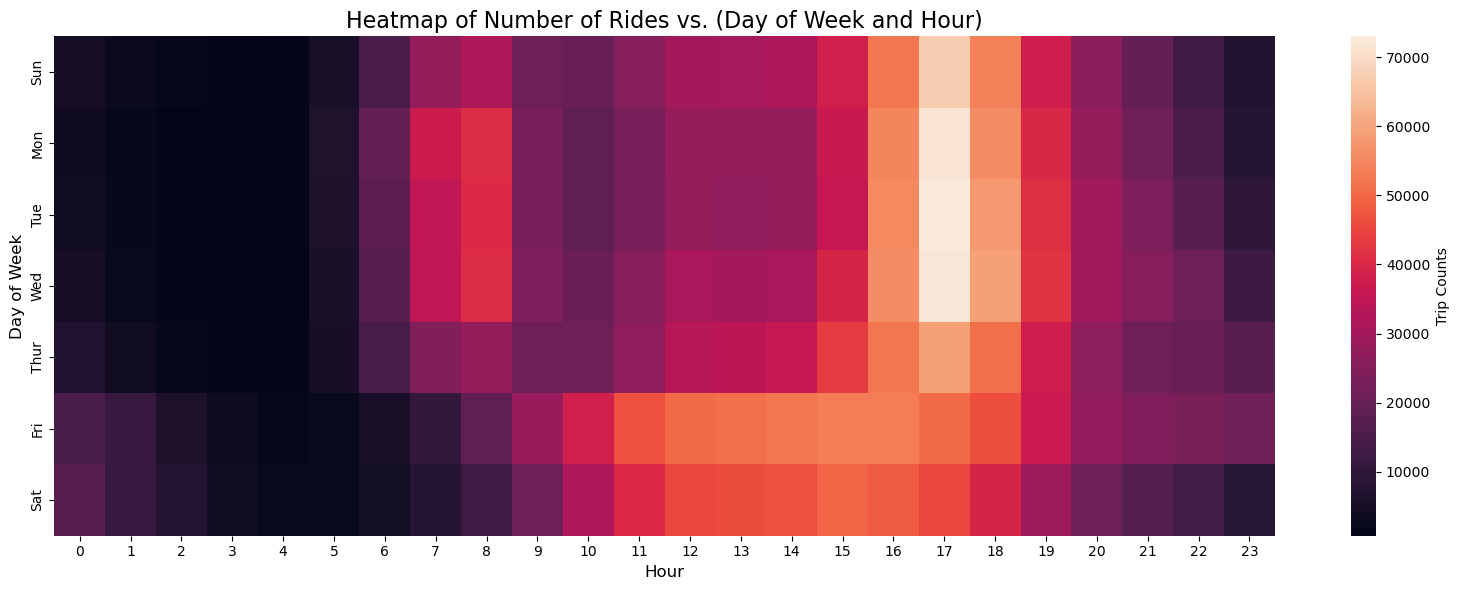

In [9]:
# heatmap of trip count vs. (day and hour)
fig, ax = plt.subplots(figsize=(16, 6))
tmp = bdat[['start_day_num', 'start_hour', 'trip_duration']].groupby(['start_day_num', 'start_hour']).count().reset_index()
pivots = tmp.pivot('start_day_num', 'start_hour', 'trip_duration')
sns.heatmap(pivots, cbar_kws={'label': 'Trip Counts'})
ax.set_title('Heatmap of Number of Rides vs. (Day of Week and Hour)', fontsize=16)
ax.set_xlabel('Hour', fontsize=12)
ax.set_ylabel('Day of Week', fontsize=12)
ax.set_yticklabels(('Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat' ), fontsize=10)
plt.tight_layout()
plt.show()

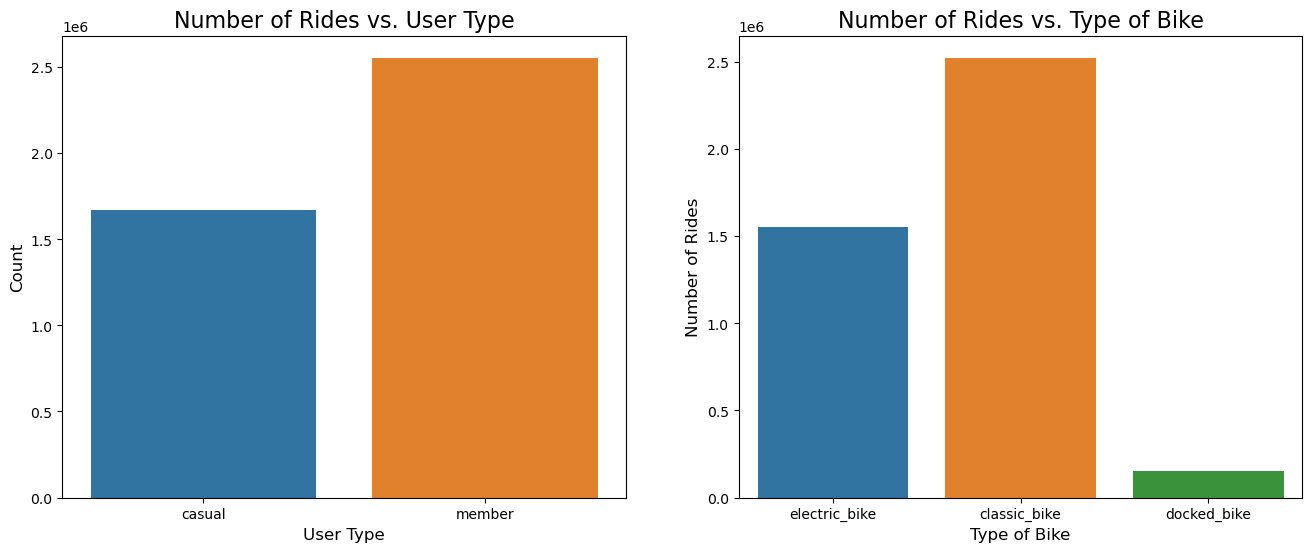

In [10]:
# Trip distribution
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='member_casual', data=bdat, ax=ax[0])
ax[0].set_title('Number of Rides vs. User Type', fontsize=16)
ax[0].set_xlabel('User Type', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
sns.countplot(x='rideable_type', data=bdat, ax=ax[1])
ax[1].set_title('Number of Rides vs. Type of Bike', fontsize=16)
ax[1].set_xlabel('Type of Bike', fontsize=12)
ax[1].set_ylabel('Number of Rides', fontsize=12)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


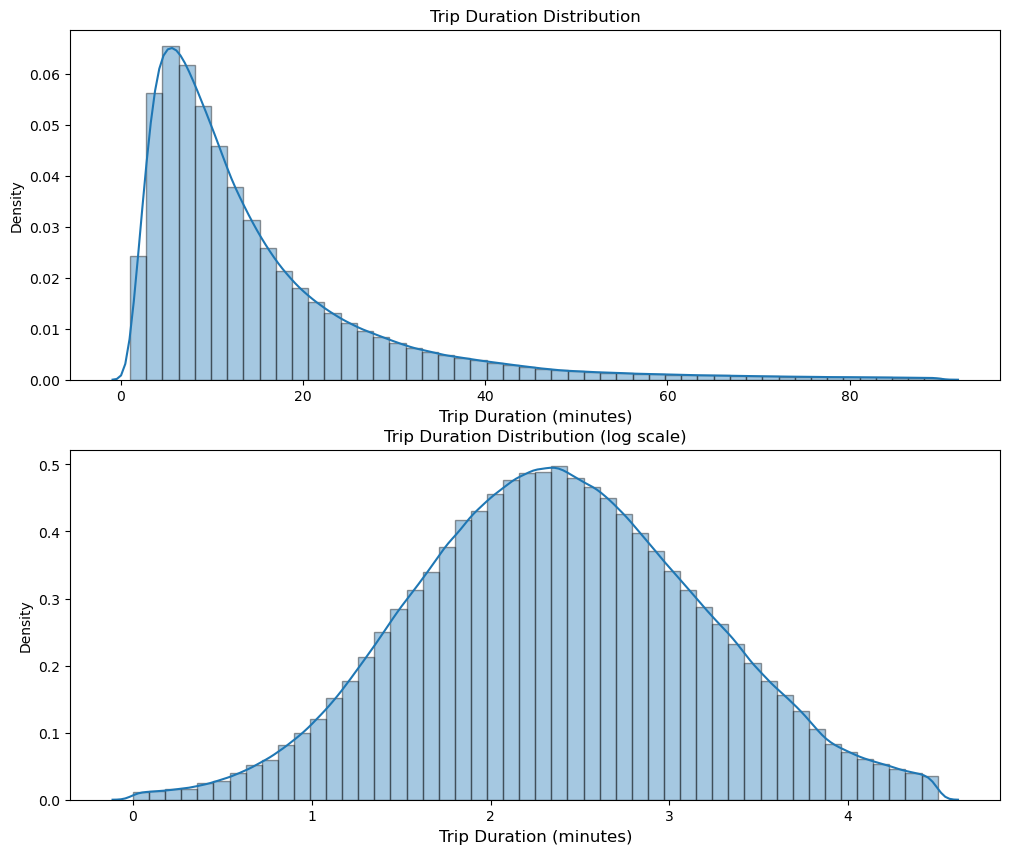

In [11]:
# Trip distribution
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
sns.distplot(bdat['trip_duration'], ax=ax[0], 
             hist_kws={'histtype': 'bar', 'edgecolor':'black'})
ax[0].set_xlabel('Trip Duration (minutes)', fontsize=12)
ax[0].set_title('Trip Duration Distribution')

sns.distplot(np.log(bdat['trip_duration']), ax=ax[1], 
             hist_kws={'histtype': 'bar', 'edgecolor':'black'})
ax[1].set_xlabel('Trip Duration (minutes)', fontsize=12)
ax[1].set_title('Trip Duration Distribution (log scale)')
plt.show()

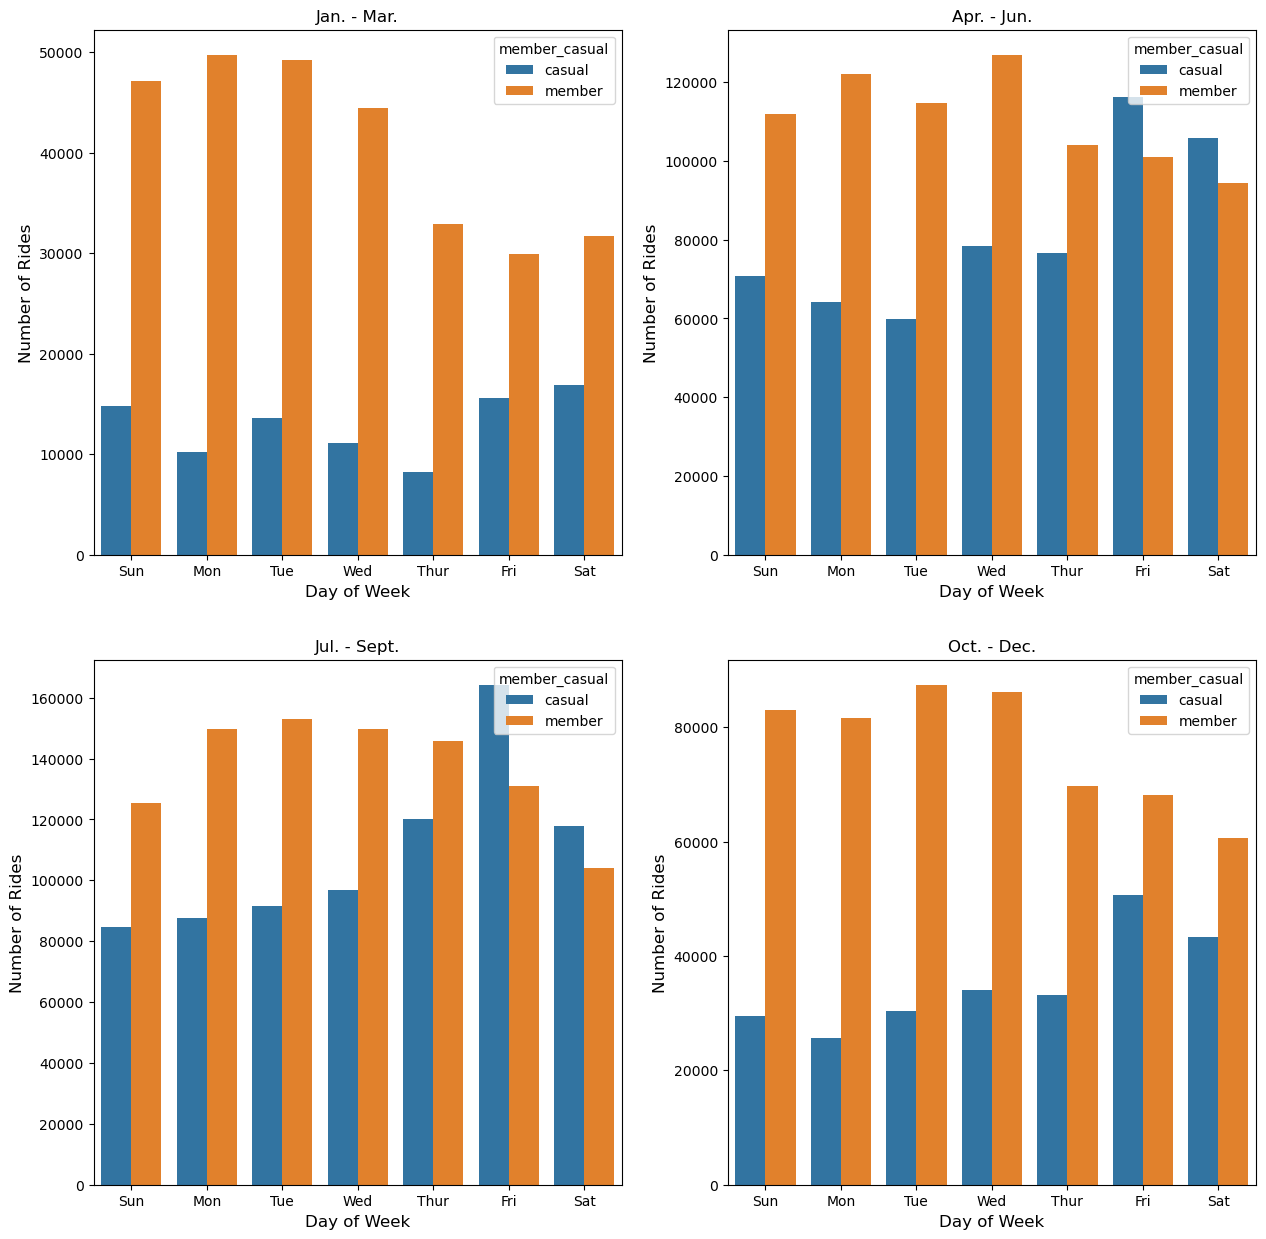

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# Flatten the 2D axes array for ease of looping
axes = np.array(axes).flatten()

# Prepare the month description titles for each quarter
quarter_names = ['Jan. - Mar.', 'Apr. - Jun.', 'Jul. - Sept.', 'Oct. - Dec.']

for q, ax in zip(sorted(bdat['Quarter'].unique()), axes):
    ax.set_title(quarter_names[(q-1)])
    
    sns.barplot(x='start_day_num', y='ride_id', hue='member_casual',
    data=bdat[bdat['Quarter']==q].groupby(['start_day_num', 'member_casual'])['ride_id'].count().reset_index(), ax=ax)
    ax.set_xlabel('Day of Week', fontsize=12)
    ax.set_ylabel('Number of Rides', fontsize=12)
    ax.set_xticklabels(('Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat' ))

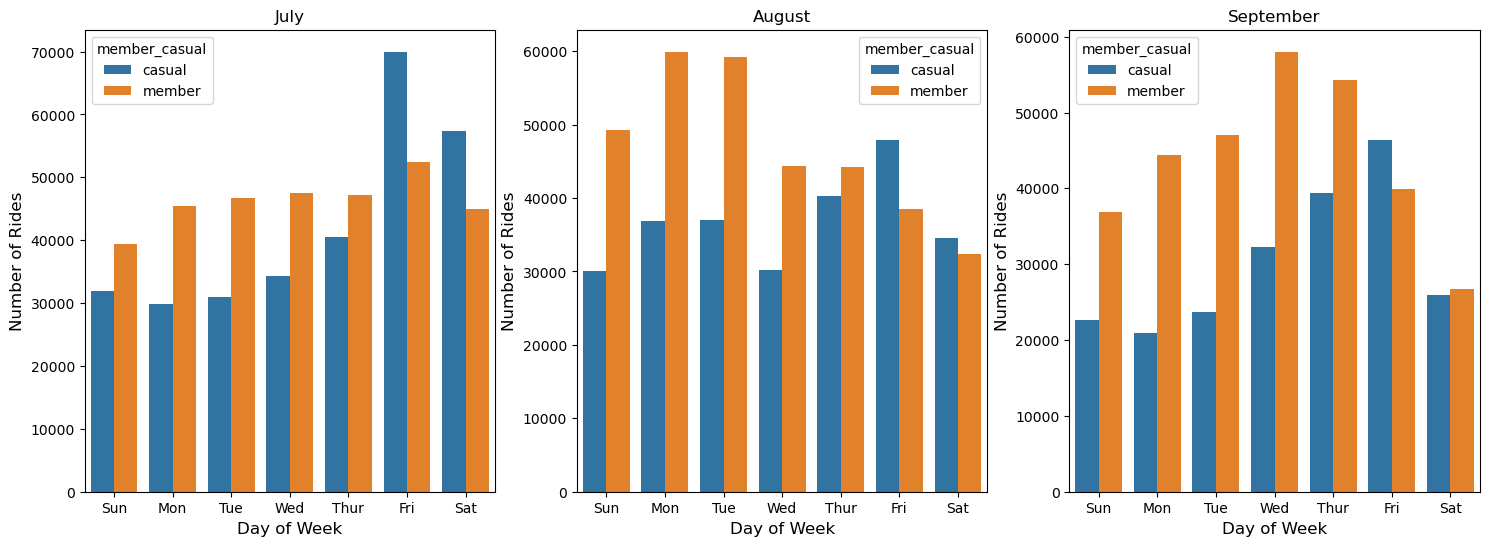

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes = np.array(axes).flatten()
for m, ax in zip(bdat[bdat['Quarter']==3]['start_month_name'].unique(), axes):
    ax.set_title(m)
    
    sns.barplot(x='start_day_num', y='ride_id', hue='member_casual', 
    data=bdat[bdat['start_month_name']==m].groupby(['start_day_num', 'member_casual'])['ride_id'].count().reset_index(),ax=ax)
    ax.set_xlabel('Day of Week', fontsize=12)
    ax.set_ylabel('Number of Rides', fontsize=12)
    ax.set_xticklabels(('Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat' ))

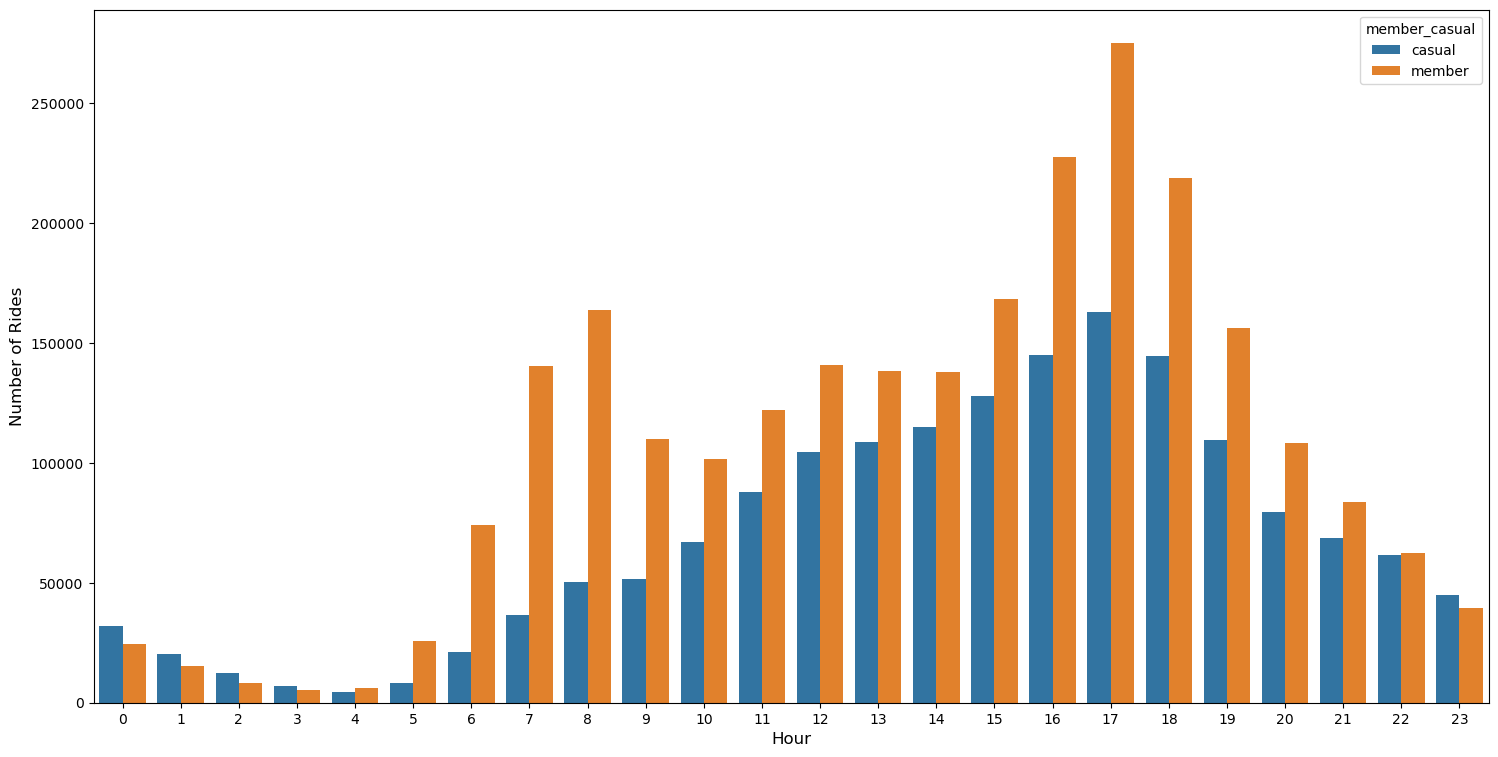

In [14]:
fig, ax = plt.subplots(figsize=(18, 9))
sns.barplot(x='start_hour', y='ride_id', hue='member_casual', 
    data=bdat.groupby(['start_hour', 'member_casual'])['ride_id'].count().reset_index(), ax=ax)
ax.set_xlabel('Hour', fontsize=12)
ax.set_ylabel('Number of Rides', fontsize=12)
plt.show()

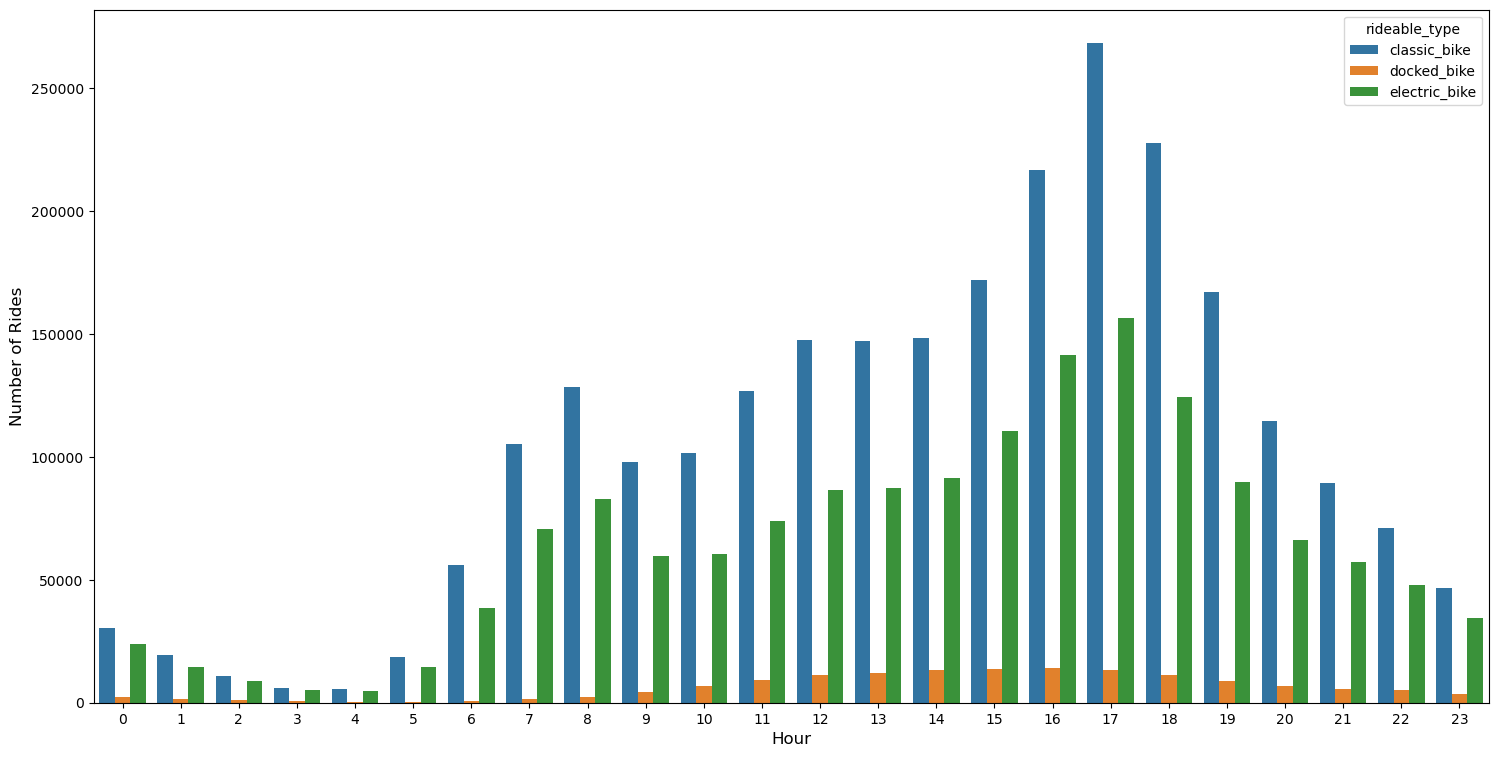

In [15]:
fig, ax = plt.subplots(figsize=(18, 9))
sns.barplot(x='start_hour', y='ride_id', hue='rideable_type', 
    data=bdat.groupby(['start_hour', 'rideable_type'])['ride_id'].count().reset_index(), ax=ax)
ax.set_xlabel('Hour', fontsize=12)
ax.set_ylabel('Number of Rides', fontsize=12)
plt.show()